<a href="https://colab.research.google.com/github/guillerZeva/Proyecto-WordCloud/blob/main/WORDCLOUD_etiquetas_stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Istalación del paquete que WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [2]:
from bs4 import BeautifulSoup as bs
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

###Métodos para el scraping

In [7]:
def ingresarBuscar():
  id_user = input("Ingrese el ID: ")
  url = "https://es.stackoverflow.com/users/" + id_user +"?tab=tags"
  res = requests.get(url)
  soup = bs(res.content)
  return soup

def scraping():
  soup = None
  etiquetas = []
  replicas = [] 

#Validar usuario existente 
  while True:
    soup = ingresarBuscar()
    valida = soup.find('div', class_='grid grid__center w100 h100')
    if valida != None:
      print("Ese usuario no existe")
    else:
      etiquetas = soup.find_all('a', class_= 'post-tag')
      replicas = soup.find_all('div', class_= 'answer-votes')
      
#Validar que el usuario tenga suficiente etiquetas
      if len(etiquetas) == 0 or len(replicas) == 0:
        print("Este usuario no tiene suficiente etiquetas para generar un WordCloud")         
      else:
        break

  return etiquetas,replicas

###Organizar las etiquetas y las replicas en un diccionario  


In [37]:
def frecuenciaEtiquetas(etiquetas, replicas):
  frecuenciaDic = {}
  if etiquetas[0].get_text() == etiquetas[1].get_text():
    etiquetas.pop(0)

  for i in range(len(etiquetas)):
    replica = replicas[i].get_text()
    etiqueta =  etiquetas[i].get_text()

    if replica[-1] == 'k':
      valor = int(replica[0:-1]) * 1000
      replica = str(valor)
    if replica == '0':  
      frecuenciaDic[etiqueta] = 1
    else:
      frecuenciaDic[etiqueta] =  float(replica)

  return frecuenciaDic  

###Generar WordCloud

In [5]:
def createWordCloud(text):
  wc = WordCloud(
      width = 3000, 
      height = 2000, 
      max_font_size=2000, 
      scale=3, 
      background_color="#333333",
      colormap="spring",
      collocations=False,)
  
  wc.generate_from_frequencies(text)
 
 # Mostrar la imagen generada:
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()


###Ejecución 

Ingrese el ID: 206458


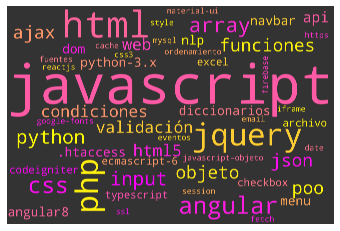

In [40]:
freEtiquetas = scraping()

frecuenciaDic = frecuenciaEtiquetas(freEtiquetas[0], freEtiquetas[1])

createWordCloud(frecuenciaDic)

